# Показатель Хёрста

**Показатель Хёрста или коэффициент Хёрста** — мера, используемая в анализе временных рядов. 

Эта величина уменьшается, когда задержка между двумя одинаковыми парами значений во временном ряду увеличивается. 

Впервые это понятие использовалось в гидрологии в практических целях для определения размеров плотины на реке Нил в условиях непредсказуемых дождей и засух, наблюдаемых в течение длительного времени. Название «Экспонента Херста» или «Коэффициент Херста» дано в честь Гарольда Эдвина Хёрста (англ.)рус. (1880—1978) — ведущего исследователя того времени в этой области. Стандартное обозначение H также дано в честь него.

Показатель Херста, H, определяется в терминах асимптотического поведения масштабированного диапазона как функции отрезка времени временного ряда следующим образом:


$$E\left[\frac{R(n)}{S(n)}\right]=Cn^{H} ,n\to \infty \,$$ 

где

$R(n)$ — размах накопленных отклонений первых $n$ значений от среднего значения ряда,

$S(n)$ — стандартное отклонение

$n$ — величина промежутка времени (количество точек в отрезке временного ряда)

$C$ — константа

Величина показателя Хёрста $H$ принимает значения от 0 до 1.

Временные ряды , **для которых $H>0.5$, считаются персистентными** — они сохраняют имеющуюся тенденцию, то есть возрастание в прошлом более вероятно приводит к возрастанию в дальнейшем, и наоборот. 

При значении $H=0.5$ явной тенденции не выражено, а при меньших значениях процесс характеризуется **антиперсистентностью** — любая тенденция стремится смениться противоположной.

Значения показателя Хёрста природных процессов группируются вблизи значений 0.72-0.73

Интересное применение показателя Хёрста - обоснование использования торговых стратегий, получивших название Возврат к среднему. В них предполагается, что такие свойства, как доходность акций и волатильность, со временем вернутся к своему долгосрочному среднему значению. Математически такой временной ряд называется процессом Орнштейна-Уленбека . В таких стратегиях инвесторы пытаются заработать деньги, предполагая, что после некоторых экстремальных событий (как положительных, так и отрицательных) цена акций вернется к долгосрочной модели.

Пример оценки показателя Хёрста продемонстрируем на примере акций всем известной компании Apple и будем делать это для разнообразия на Python.

In [92]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

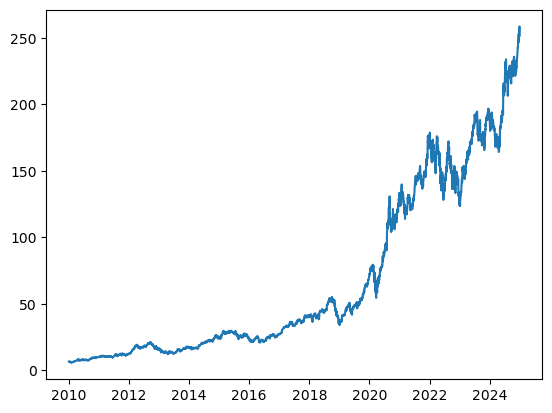

In [95]:
appl_df = yf.download("AAPL", start="2010-01-01", end="2024-12-31", progress=False)
plt.plot(appl_df['Close'])
plt.show()

In [96]:
def get_hurst_exponent(time_series, max_lag=20):
#"""Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [97]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(appl_df["Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4913
Hurst exponent with 100 lags: 0.4651
Hurst exponent with 300 lags: 0.4262
Hurst exponent with 500 lags: 0.4476
Hurst exponent with 1000 lags: 0.4846


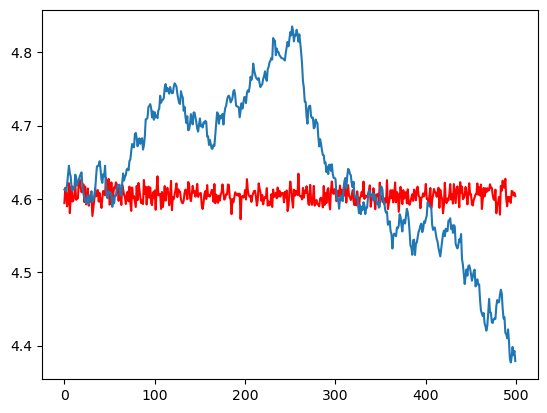

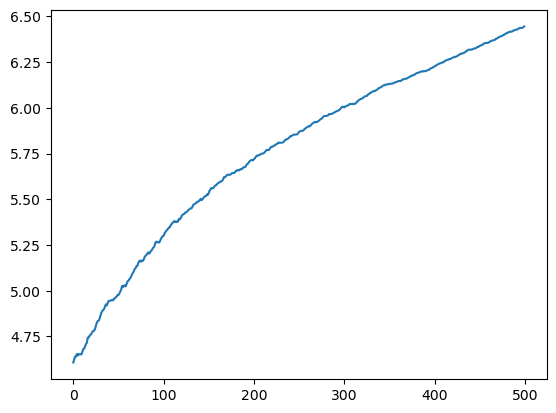

In [101]:
sample_size = 500
scalar = 100

np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})
plt.plot(df['mean_rev'], color = 'red')
plt.plot(df['gbm'])
plt.show()
plt.plot(df['trending'])

plt.show()

In [100]:
#Посмотрим показатель Херста для смоделированных рядов
for lag in [20, 100, 300, 500]:
    print(f"Hurst exponents with {lag} lags ----")
    for column in df.columns:
        print(f"{column}: {get_hurst_exponent(df[column].values, lag):.4f}")

Hurst exponents with 20 lags ----
mean_rev: 0.0047
gbm: 0.5045
trending: 0.7903
Hurst exponents with 100 lags ----
mean_rev: -0.0116
gbm: 0.5587
trending: 0.8191
Hurst exponents with 300 lags ----
mean_rev: 0.0014
gbm: 0.4562
trending: 0.6712
Hurst exponents with 500 lags ----
mean_rev: nan
gbm: nan
trending: nan


/var/folders/j5/bxln7n_n1lqddqxgf6pc4vpc0000gn/T/ipykernel_1921/1217485255.py:7: RuntimeWarning: divide by zero encountered in log
  reg = np.polyfit(np.log(lags), np.log(tau), 1)


Выводы для ряда с возвратом к среднему наиболее согласуются по всем значениям лагов. Мы должны просто отметить, что отрицательное значение для максимального лага 100, вероятно, связано с некоторыми приближениями и по замыслу, оно должно останавливаться на 0.

Для ряда случайных блужданий значение показателя степени колеблется вокруг предполагаемого значения 0.5.

Наконец, трендовый ряд правильно определяется показателем Херста для всех выбранных лагов, однако по мере увеличения лага значение показателя уменьшается до 0.5, что указывает на случайное блуждание.

Выводы из анализа

Показатель Херста является мерой памяти во временном ряду и используется для классификации ряда как среднего возврата, тренда или случайного блуждания.

в зависимости от выбора параметра максимального запаздывания (т. е. от того, ищем ли мы краткосрочную или долгосрочную перспективу), результаты могут существенно различаться.

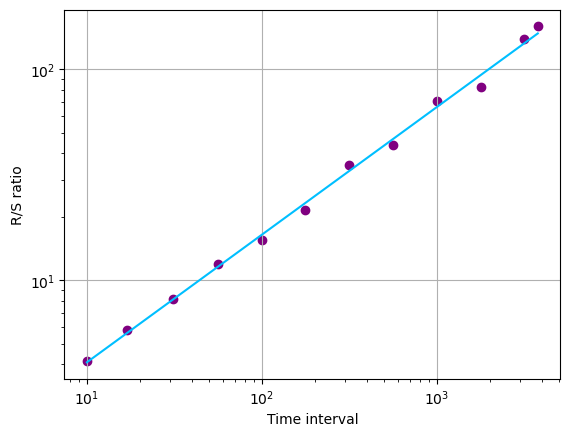

H=0.6051, c=1.0151
H=0.1760, c=1.5942
H=0.5988, c=1.0068
H=0.9395, c=1.3692


In [102]:
# Evaluate Hurst equation
H, c, data = compute_Hc(appl_df["Close"], kind='random_walk', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))
H, c, data = compute_Hc(df['mean_rev'], kind='random_walk', simplified=True)

print("H={:.4f}, c={:.4f}".format(H,c))
H, c, data = compute_Hc(df['gbm'], kind='random_walk', simplified=True)
print("H={:.4f}, c={:.4f}".format(H,c))
# Plot


H, c, data = compute_Hc(df['trending'], kind='random_walk', simplified=True)
print("H={:.4f}, c={:.4f}".format(H,c))

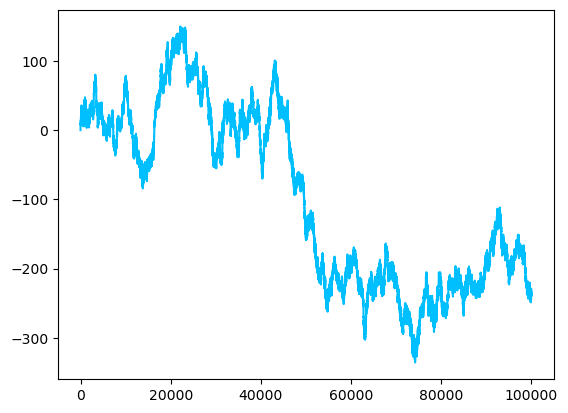

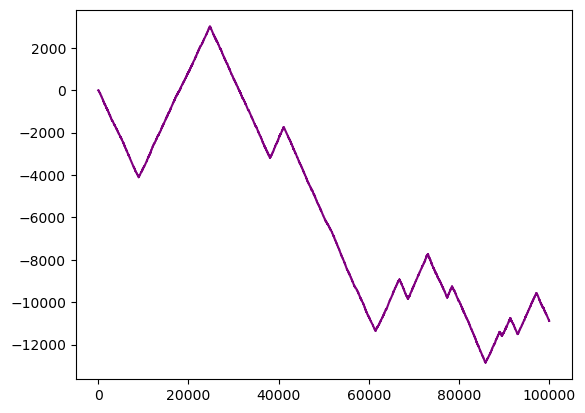

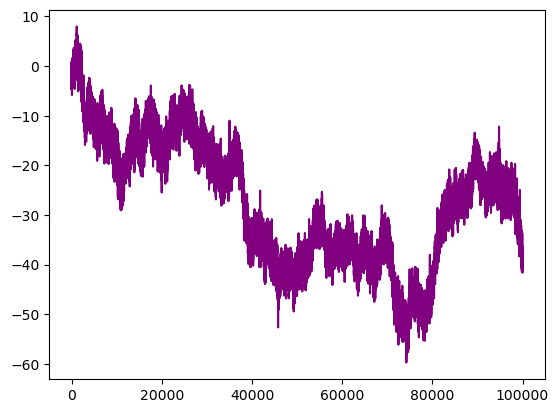

In [103]:
#Моделируем временные ряды с показателем Херста 0.5, 0.7 и 0.2 соответственно
brownian = random_walk(99999, proba=0.5)
f, ax = plt.subplots()
ax.plot(brownian, color="deepskyblue")
plt.show()

brow7 = random_walk(99999, proba=0.8)
f, ax = plt.subplots()
ax.plot(brow7, color="purple")
plt.show()

brow2 = random_walk(99999, proba=0.2)
f, ax = plt.subplots()
ax.plot(brow2, color="purple")
plt.show()


# Модели стационарных временных рядов

In [25]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

В этой лекции через $y_t$ будет обозначать наблюдаемый случайный процесс, а $\epsilon_t$ ненаблюдаемый процесс белого шума.

**Общим линейным процессом типа скользящего среднего называется процесс вида**
$$y_t=\epsilon_t+\psi_1\epsilon_{t-1}+\psi_2\epsilon_{t-2}+....+\psi_n\epsilon_{t-n}+....$$
Введем линейный оператор сдвига назад
$B: By_t=y_{t-1}$

По индукции 
$B^k: B^ky_t=y_{t-k}$

Используя оператор сдвига, определение линейного  процесса типа скользящего среднего будем записывать в операторном виде
$y_t=(1+\psi_1B+\psi_2B^2+.....)\epsilon_t= \psi(B)\epsilon_t$


Будем предполагать, что

$\sum_{i=1}^{\infty}\psi_i < \infty$

Важный нетривиальный пример такого процесса это процесс, где все
$\psi_i=\phi^i$, при $-1<\phi<1$ 

В этом случае

$$y_t= (1+\phi B+\phi^2B^2+...)\epsilon_t=\epsilon_t+\phi\epsilon_{t-1}+\phi^2\epsilon_{t-2}+...$$

Так как $\epsilon_t$ - процесс белого шума  $E[\epsilon_t]=0$, поэтому

$E[y_t]=E[\epsilon_t+\phi\epsilon_{t-1}+\phi^2\epsilon_{t-2}+...]= 0$

Пусть $D[\epsilon_t]=\sigma_{\epsilon}^2$ тогда

$D[y_t]=D[\epsilon_t+\phi\epsilon_{t-1}+\phi^2\epsilon_{t-2}+...]= \sigma_{\epsilon}^2+\phi^2\sigma_{\epsilon}^2+\phi^4\sigma_{\epsilon}^2+... = \sigma_{\epsilon}^2(1+\phi^2+\phi^4+...)= \frac{\sigma_{\epsilon}^2}{1-\phi^2}$

Вычислим автоковариационную и автокорреляционную функции процесса

$c_1=cov(y_t,y_{t-1})= cov((\epsilon_t+\phi\epsilon_{t-1}+\phi^2\epsilon_{t-2}+...),( \epsilon_{t-1}+\phi\epsilon_{t-2}+\phi^2\epsilon_{t-3}+...))= \phi\sigma_{\epsilon}^2(1+\phi^2+\phi^4+...)=\frac{\phi\sigma_{\epsilon}^2}{1-\phi^2}$

$corr(y_t,y_{t-1})= \frac{\phi\sigma_{\epsilon}^2}{1-\phi^2}/(\frac{\sigma_{\epsilon}^2}{1-\phi^2})= \phi$

Аналогично вычислим 

$c_k=cov(y_t,y_{t-k})=\frac{\phi^k\sigma_{\epsilon}^2}{1-\phi^2}$

$\gamma_k=corr(y_t,y_{t-k})=\phi^k$  

Для произвольного линейного процесса скользящего среднего  $y_t=(1+\psi_1B+\psi_2B^2+.....)\epsilon_t= \psi(B)\epsilon_t$
Нетрудно вычислить, что

$E[y_t=0]$,

$c_k=cov(y_t,y_{t-k})=\sigma_{\epsilon}^2\sum_{i=0}^{\infty}\psi_i\psi_{i+k}$

Важно отметить, что ковариационная функция не зависит от $t$
, зависит только от задержки $k$ cледовательно это стационарный процесс
с нулевым среднем. Для получения процесса с произвольным среднем $\mu$ просто добавим $\mu$ к правой части соотношения 
$y_t=(1+\psi_1B+\psi_2B^2+.....)\epsilon_t+\mu= \psi(B)\epsilon_t+\mu$

В случае конечного числа $\psi_k$ отличных от нуля модель записывают
в виде

$y_t=\mu+\epsilon_t-\theta_1\epsilon_1- ...-\theta_q\epsilon_q$ 

называют **моделью скользящего среднего порядка $q$ и обозначают $MA(q)$**

## Модель $MA(1)$

Подробно рассмотрим модель скользящего среднего первого порядка с нулевым среднем $y_t=\epsilon_t-\theta\epsilon_{t-1}$

Cогласно проведенным выше вычислениям сразу запишем, что
автоковариационная функция процесса $y_t$

$c_0=D[y_t]= \sigma_{\epsilon}^2(1+\theta^2)$

$c_1=cov(y_t,y_{t-1})=-\sigma_{\epsilon}^2\theta$

$c_k = 0$ при $|k|>1$

автокорреляционная функция процесса $y_t$

$\rho_0=1$

$\rho_1= -\theta/(1+\theta^2)$

$\rho_k= 0$ при $|k|>1$


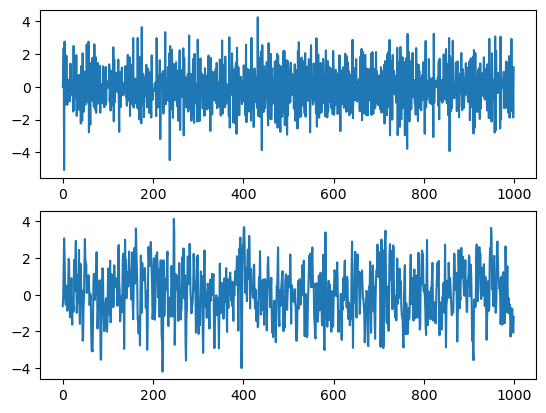

In [104]:
# Plot 1: MA parameter: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

# Plot 2: MA parameter: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

In [105]:
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)

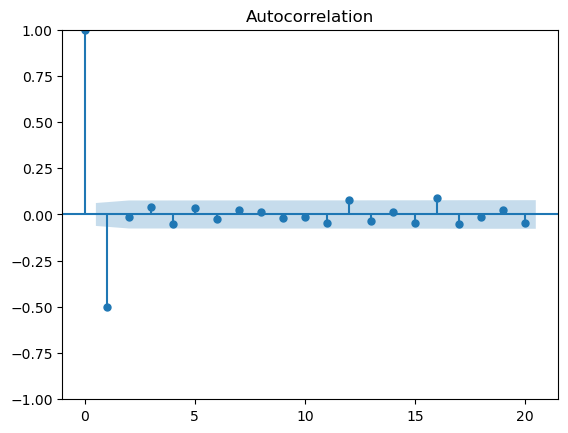

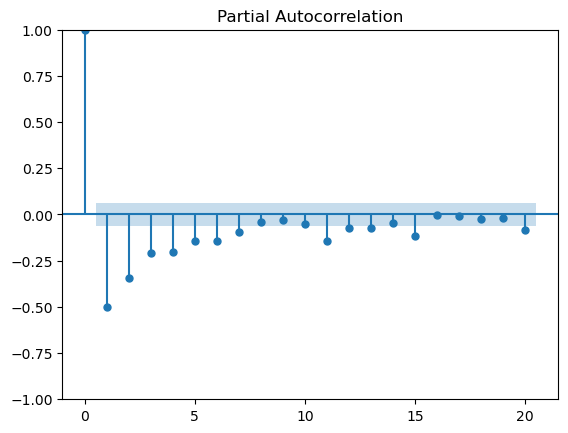

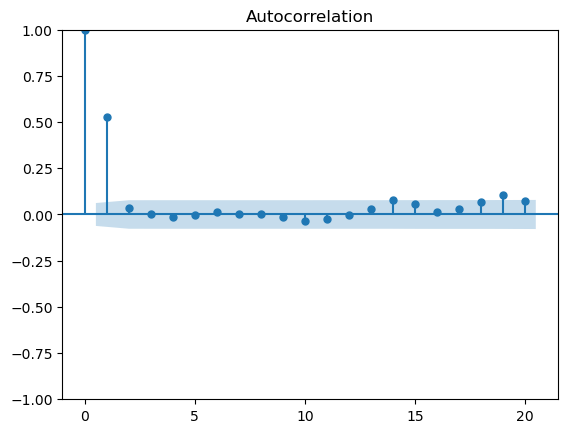

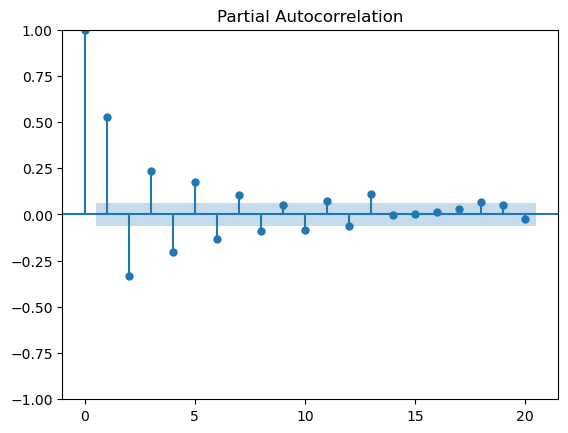

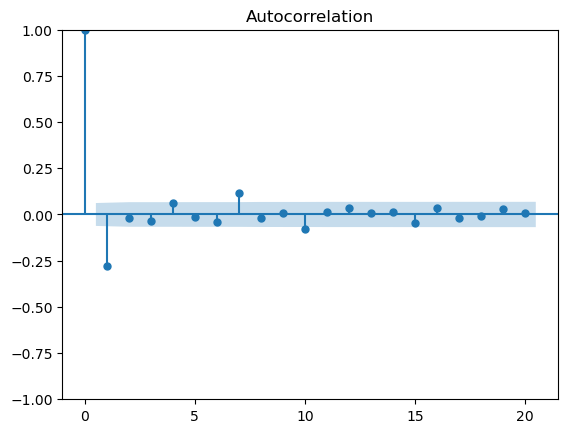

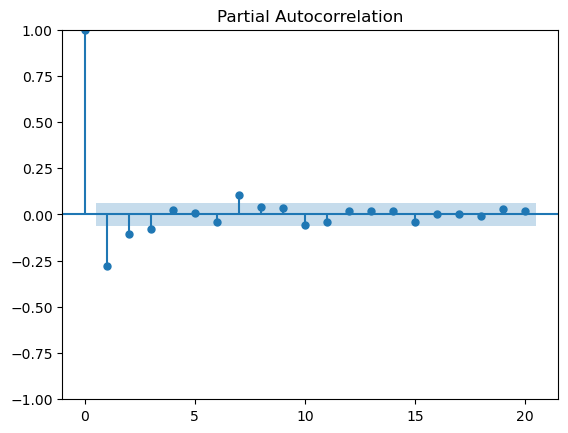

In [106]:
# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plot_pacf(simulated_data_1, lags=20)

# Plot 2: MA parameter = +0.9
plot_acf(simulated_data_2, lags=20)
plot_pacf(simulated_data_2, lags=20)

# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plot_pacf(simulated_data_3, lags=20)
plt.show()

## Процесс $MA(q)$

Теперь рассмотрим процесс скользящего среднего произвольного порядка $MA(q)$

$y_t=\epsilon_t-\theta_1\epsilon_{t-1}-...-\theta_q\epsilon_{t-q}$

Для процесса $y_t$ дисперсия

$c_0=D[y_t]=\sigma_{\epsilon}^2(1+\theta_1^2+....+\theta_q^2)$

автокорреляционная функция

$\rho_k= \frac{-\theta_{k}+\theta_{k-1}\theta_{1}-\theta_{k-2}\theta_{2}+\theta_{k-q}\theta_{q}}{(1+\theta_1^2+....+\theta_q^2)}$ при $k=1,...,q$

$\rho_k=0$ при $k>q$


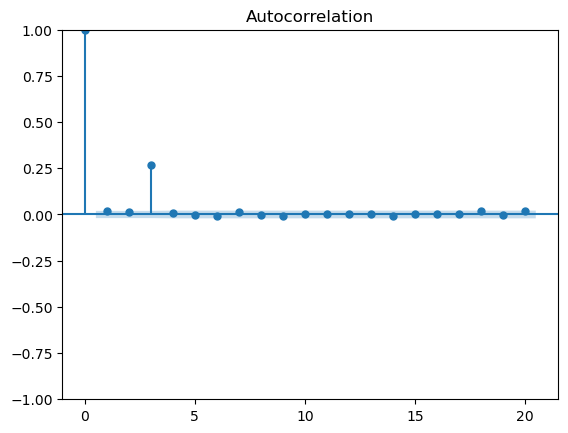

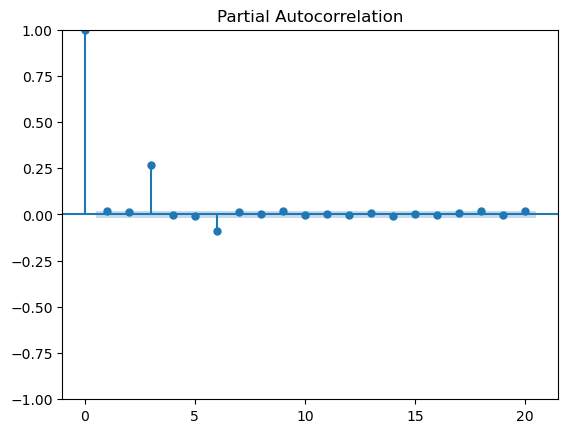

In [109]:
## Модель $MA(3)$
ar1 = np.array([1])
ma3 = np.array([3, 0, 0, 0.9])
MA_object1 = ArmaProcess(ar1, ma3)
simulated_data = MA_object1.generate_sample(nsample=10**4)
plot_acf(simulated_data, lags=20)
plot_pacf(simulated_data, lags=20)
plt.show()

## Процессы авторегрессии

Общим **линейным процессом типа авторегрессии называется** процесс вида
$$y_t=\epsilon_t+\pi_1y_{t-1}+\pi_2y_{t-2}+....+\pi_ny_{t-n}+....$$
или в операторном виде
$$\pi(B)y_t=\epsilon_t$$

Название происходит от регрессии самого на себя. Процесс вида


$y_t= \phi_1y_{t-1}+\phi_2y_{t-2}+...+\phi_py_{t-p}+\epsilon_t$

назвается процессом авторегрессии порядка $p$ обозначается $AR(p)$.
Запись с использованием оператора сдига назад $B$ и в операторной форме

$(1 - \phi_1B-\phi_2B^2-...- \phi_pB^p) y_t=\phi(B)y_t=\epsilon_t$

**Соотношение между $\pi(B)$ и $\psi(B)$**
Итак мы имеем два типа предствления
	$$ \pi(B)x_{t}=\epsilon_{t} $$
и
	$$x_{t}=\psi(B)\epsilon_{t}$$

    
Умножим первое из них слева на $\psi(B)$
$$\psi(B)\pi(B)x_{t}=\psi(B)\epsilon_{t}=x_{t}$$
Отсюда следует, что
$$\psi(B)\pi(B)=1$$ 
или
	$$\psi(B)=\pi^{-1}(B)$$


### Процесс авторегрессии 1 порядка $AR(1)$

Пусть стационарный процесс c нулевым среднем представим в виде

$y_t=\phi y_{t-1}+\epsilon_t$

или, используя оператор сдвига 

$\phi(B)x_t = \epsilon_t$

где $\phi(B)=1-\phi B$

Вычислим дисперсию $c_0=D[y_t]$ 

$c_0=\phi^2c_0+\sigma_{\epsilon}^2$

Умножая выражение для процесса на $y_{t-k}$ и ,беря математическое ожидание от обеих частей получим выражение для ACF процесса

$E[y_ty_{t-k}]= \phi E[y_{t-1}y_{t-k}]+E[\epsilon_ty_{t-k}]$

$c_k= \phi c_{k-1}$

Откуда 

$c_k=\phi^k \frac{\sigma_{\epsilon}^2}{1-\phi^2}$


Автокорреляционная функция 

$\rho_k=\frac{c_k}{c_0}=\phi^k$

Предположим, чья $|\phi |< 1$ в этом случае $\rho_k \to 0$ при $k \to \infty$

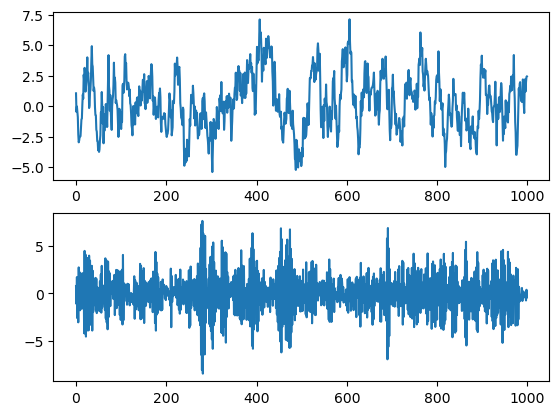

In [110]:
# Plot 1: AR parameter = +0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

# Plot 2: AR parameter = -0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

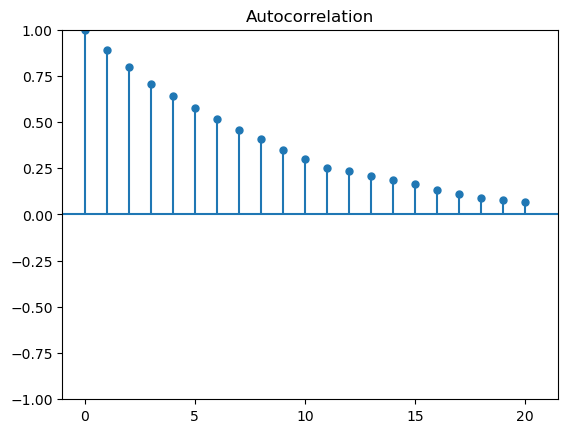

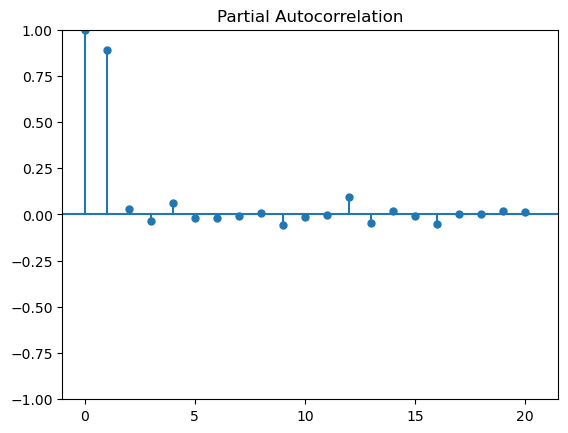

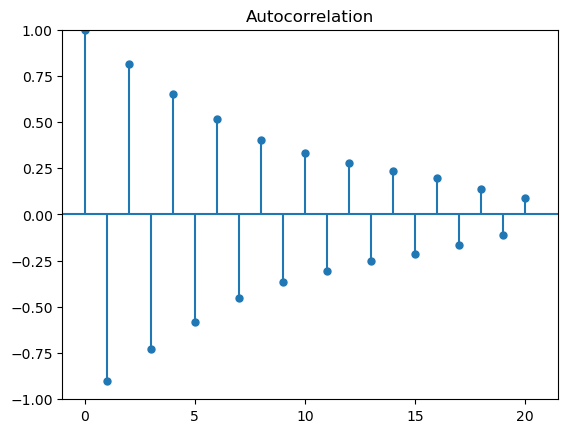

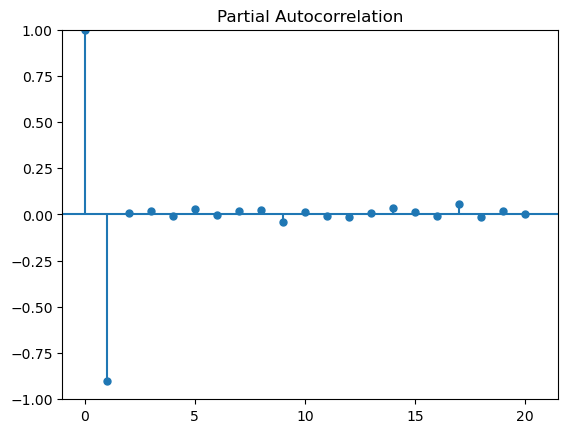

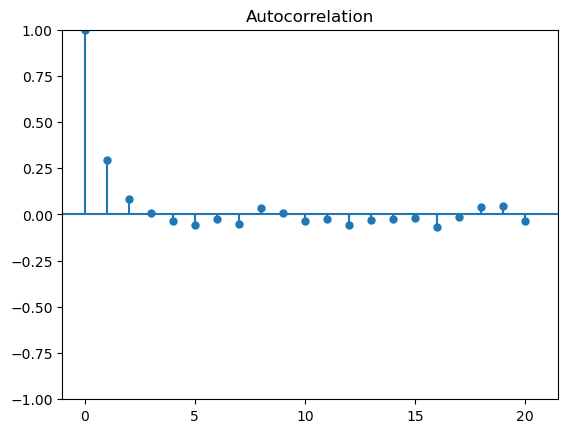

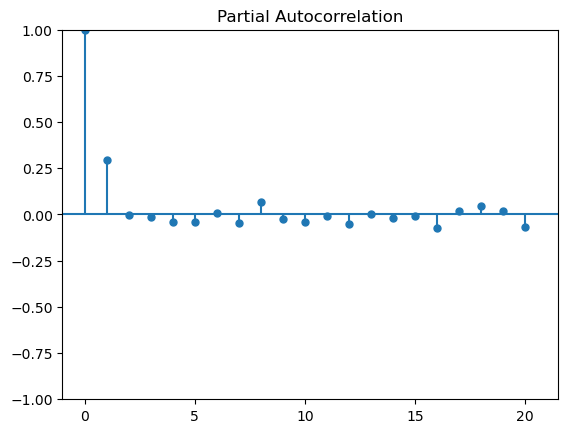

In [112]:
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
# Plot 1: AR parameter = +0.9
plot_pacf(simulated_data_1, alpha=1, lags=20)


# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
# Plot 2: AR parameter = -0.9
plot_pacf(simulated_data_2, alpha=1, lags=20)


# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
# Plot 3: AR parameter = +0.3
plot_pacf(simulated_data_3, alpha=1, lags=20)
plt.show()






## Процесс авторегрессии 2 порядка. $AR(2)$

Пусть процесс c нулевым среднем представим в виде

$y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2}+ \epsilon_t$

или, используя оператор сдвига 


$\phi (B)x_t = \epsilon_t$

где $\phi(B)=1-\phi_1 B- \phi_2 B^2$

Можно покачать, что для стационарности $AR(2)$ процесса необходимо и достаточно, чтобы корни характеристического уравнения $\phi(B) = 0$  или $1-\phi_1 B- \phi_2 B^2=0$ по модулю были больше 1. Корни характеристического уравнения легко найти

$B_{1,2}=\frac{\phi_1+-\sqrt{\phi_1^2+4\phi_2}}{-2\phi_2}$

Абсолютные значения корней должны быть больше 1. Отсюда можно получить условия на $\phi_1,\phi_2$ а именно

$\phi_1+\phi_2<1$,$\phi_2-\phi_1<1$ и $|\phi_2|<1$ 

Вычислим автоковариационную и автокорреляционную функции процесса $AR(2)$
Умножая предствление процесса на $y_{t-k}$ и, беря математическое ожидание, получим

$c_k= \phi_1c_{k-1}+\phi_2c_{k-2}$  $:k=1,2,....$

автокорреляционная функция

$\rho_k= \phi_1\rho_{k-1}+\phi_2\rho_{k-2}$  $:k=1,2,....$

Последнее уравнение носит название уравнение Юла-Уокера. Его обычно решают численно, но существует и другой способ нахождения $\rho_k$
обозначим через $G_1,G_2$ корни характеристического уравнения $1-\phi_1 B- \phi_2 B^2=0$

$G_1= \frac{\phi_1+\sqrt{\phi_1^2+4\phi_2}}{2}$

$G_2= \frac{\phi_1-\sqrt{\phi_1^2+4\phi_2}}{2}$

Если $G_1\ne G_2$
то можно показать,что

$$\rho_k=\frac{(1-G_2^2)G_1^{k+1}- (1-G_1^2)G_2^{k+1}}{(G_1-G_2)(1+G_1G_2)}$$

Eсли корни комплексны, тогда

$\rho_k=R^k\frac{sin(\Theta k+\Phi)}{sin\Phi}$

где $R =\sqrt{-\phi_2}$,  $cos\Theta=\phi_1/(2\sqrt{-\phi_2})$ и $tan\Phi=(1-\phi_2)/(1+\phi_2)$

Поведение процесса, выборочной и модельной (True ACF) автокорреляционной  функции при различных параметрах $\phi_1,\phi_2$ можно изучить в прилагаемом ниже фрейме на примере процесса $AR(2)$.

**Дисперсия процесса $AR(2)$**


Чтобы вычислить дисперсию процесса $AR(2)$ возьмем оператор дисперсии от обеих частей
$$y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2}+ \epsilon_t$$


$$c_0=D[y_t]=(\phi_1^2+\phi_2^2)+2\phi_1\phi2+\sigma_{\epsilon}^2  ~~~~ (*)$$          

У нас есть уравнение $c_k= \phi_1c_{k-1}+\phi_2c_{k-2}$  $:k=1,2,....$
при $k=1$ оно примет вид $c_1= \phi_1c_{0}+\phi_2c_{1}$
Уравненике $(*)$  и последнее уравнение нам даст

$$c_0=\frac{1-\phi_1}{1+\phi_2}\frac{\sigma_{\epsilon}^2}{(1-\phi_2)^2-\phi_1^2}$$


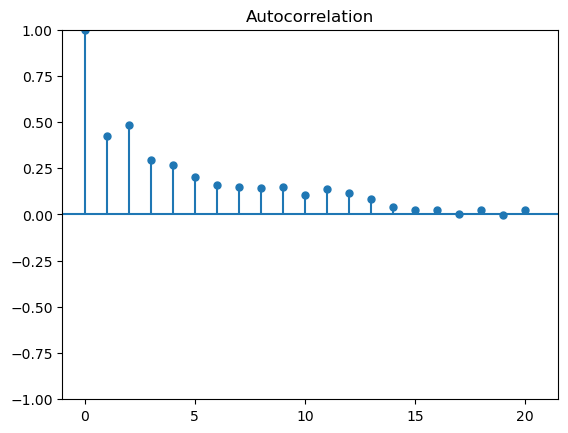

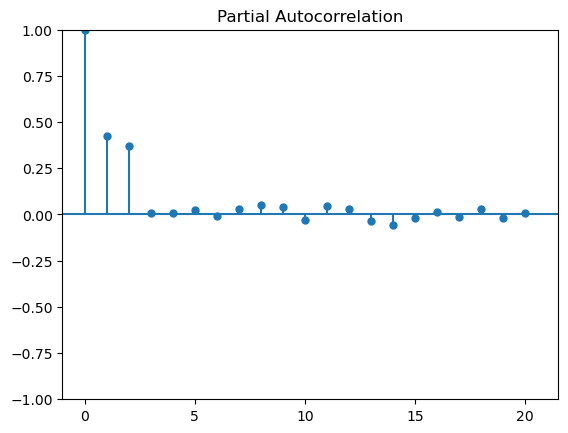

In [114]:
# Модель AR(2)

ar3 = np.array([2, -0.5, -0.8])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

plot_acf(simulated_data_3, alpha=1, lags=20)
plot_pacf(simulated_data_3, alpha=1, lags=20)
plt.show()

## Процесс авторегрессии произвольного порядка. $AR(p)$

Процесс вида

$$y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2}+...-+\phi_p y_{t-p}+ \epsilon_t  ~~~(1)$$

называется **процессом авторегрессии порядка $p$**

В операторной форме

$\phi (B)y_t = \epsilon_t$

$(1-\phi_1 B-...-\phi_p B^p)y_t = \epsilon_t$

характеристическое уравнение

$1-\phi_1 B-...-\phi_p B^p= 0$

Процесс авторегрессии порядка $p$ стационарен тогда и только тогда корни характеристического уравнения по модулю больше единицы, или корни лежат вне единичной окружности $|z|= 1$

 Умножая (1) на $y_{t-k}$, и ,разделив на $c_0=D[y_t]$, берем математическое ожидание от обоих частей полученного соотношения, получим
  
  
  $\rho_k=\phi_1\rho_{k-1}+...+\phi_p \rho_{k-p}$
  
  Полагая последовательно $k=1,..,p$, получим систему линейных алгебраических уравнений
  
  $\rho_1=\phi_1+...+\phi_p \rho_{p-1}$
  
  $\rho_2=\phi_1\rho_1+...+\phi_p \rho_{p-2}$
  
  $...$
  
  $\rho_p=\phi_1\rho_{p-1}+...+\phi_p$
  
  Эта система уравнений носит название Юла-Уокера. Зная набор чисел $\phi_1,\phi_2,...,\phi_p$ можно из системы вычислить 
 $\rho_1,\rho_2,...,\rho_p$
и наоборот.  

С уравнением Юла Уокера связано появление функции частной автокорреляции
(PACF). Последовательно будем решать их для $k=1,2,...,p$
При $k=1$ оно имет вид
$$\rho_1=\phi_1$$
Решение его обозначим $\phi_{1,1}$.

Для $k=2$
  $$\rho_1=\phi_1+\phi_2\rho_{1}$$
  
  $$\rho_2=\phi_1\rho_1+\phi_2$$
  
Решение его обозначим 

$$\phi_{2,1},\phi_{2,2}$$

И так далее повышаем порядок уравнения и решения для порядка $k$ его обозначаем 

$$\phi_{k,1},\phi_{k,2},..., \phi_{k,k}$$

Функция от $k$, поученная из решений уравнения при старших степенях уравнений
$\phi_{1,1},\phi_{2,2},...,\phi_{p,p},...,\phi_{k,k}$ получила название **частной автокорреляционной функции (PACF)**. 

Для $AR(p)$ она по построению имеет отличные от нуля значения до $\phi_{1,1},\phi_{2,2},...,\phi_{p,p}$
далее при $k>p$ должны следовать нули так как соответствующие $\phi_k$ в модели $AR(p)$ имеются в наличии только до порядка $p$. На практике конечно нули мы не увидим однако, дисперсия  $$D[\phi_{k,k}]\approx\frac{1}{n}$$
попадание значений PACF в полосу $\pm\frac{1}{\sqrt{n}}$ является сигналом к идентификации порядка модели $p$. 


Выражение для дисперсии процесса получим из (1), умножив его на $y_t$,  и , беря математическое ожидание, получим

$D[y_t]= c_0= \frac{\sigma_{\epsilon}^2}{1-\phi_1\rho_1-... -\phi_p\rho_p}$
  


## Идентификация моделей $AR(p)$ и $МА(q)$

Давайте потренеруемся
https://shiny.ilykei.com/ANDoynikov/ARMA_Model/Identifitation_ARMA_test/